# Laboratorio 11
## Esercizio 11.1
Svolgo un'analisi delle reti neurali, studiando il fit della retta $y=2x+1$. I dati utilizzati sono distribuiti normalmente attorno a questa retta, con una deviazione standard $\sigma\in[0.1,1.1]$; ho variato il numero di epoche nell'intervallo $n_{epochs}\in[10,60]$ ed il numero di dati nel dataset di training $N_{train}\in[500,1000]$.

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Costruisco una rete neurale con $N_{epochs}=10$:

In [2]:
import numpy as np

np.random.seed(0)

x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

N_train = np.zeros(6)
sigma = np.zeros(6)
score10 = np.zeros((6,6,2))
weight10 = np.zeros((6,6,2))

history10 = []


#GRID SEARCH
for i in range(6):
    N_train[i] = 500 + i*100
    row = []
    for j in range(6):
        sigma[j] = 0.1 + j*0.2 # noise standard deviation
        x_train = np.random.uniform(-1, 1, int(N_train[i]))
    
        y_train = np.random.normal(m * x_train + b, sigma[j]) # actual measures from which we want to guess regression parameters
        y_valid = np.random.normal(m * x_valid + b, sigma[j])
        # fit the model using training dataset
        # over 10 epochs of 32 batch size each
        # report training progress against validation data
        print("\n\nN_train = ",N_train[i])
        print("Sigma = ",sigma[j])
        row.append(model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=10,
              shuffle=True, # a good idea is to shuffle input before at each epoch
              validation_data=(x_valid, y_valid)))
        score10[i][j] = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
        pesi = model.get_weights()
        weight10[i][j] = [pesi[0][0][0],pesi[1][0]]
        print("\nWeight:",pesi)
    history10.append(row)



N_train =  500.0
Sigma =  0.1
Epoch 1/10
16/16 [==============================] - 0s 11ms/step - loss: 2.0436 - mse: 2.0436 - val_loss: 1.9030 - val_mse: 1.9030
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 1.4627 - mse: 1.4627 - val_loss: 1.3658 - val_mse: 1.3658
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 1.0817 - mse: 1.0817 - val_loss: 1.0075 - val_mse: 1.0075
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 0.8206 - mse: 0.8206 - val_loss: 0.7622 - val_mse: 0.7622
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6356 - mse: 0.6356 - val_loss: 0.5871 - val_mse: 0.5871
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4986 - mse: 0.4986 - val_loss: 0.4566 - val_mse: 0.4566
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 0.3946 - mse: 0.3946 - val_loss: 0.3601 - val_mse: 0.3601
Epoch 8/10
16/16 [==============================] - 0s 2m

Costruisco una rete neurale con $N_{epochs}=20$:

In [3]:
N_train = np.zeros(6)
sigma = np.zeros(6)
score20 = np.zeros((6,6,2))
weight20 = np.zeros((6,6,2))

history20 = []


#GRID SEARCH
for i in range(6):
    N_train[i] = 500 + i*100
    row = []
    for j in range(6):
        sigma[j] = 0.1 + j*0.2 # noise standard deviation
        x_train = np.random.uniform(-1, 1, int(N_train[i]))
    
        y_train = np.random.normal(m * x_train + b, sigma[j]) # actual measures from which we want to guess regression parameters
        y_valid = np.random.normal(m * x_valid + b, sigma[j])
        # fit the model using training dataset
        # over 20 epochs of 32 batch size each
        # report training progress against validation data
        print("\n\nN_train = ",N_train[i])
        print("Sigma = ",sigma[j])
        row.append(model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=20,
              shuffle=True, # a good idea is to shuffle input before at each epoch
              validation_data=(x_valid, y_valid)))
        score20[i][j] = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
        pesi = model.get_weights()
        weight20[i][j] = [pesi[0][0][0],pesi[1][0]]
        print("\nWeight:",pesi)    
        history20.append(row)



N_train =  500.0
Sigma =  0.1
Epoch 1/20
16/16 [==============================] - 0s 4ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0117 - val_mse: 0.0117
Epoch 2/20
16/16 [==============================] - 0s 3ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 3/20
16/16 [==============================] - 0s 3ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 4/20
16/16 [==============================] - 0s 3ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 5/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 6/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 7/20
16/16 [==============================] - 0s 2ms/step - loss: 0.0090 - mse: 0.0090 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 8/20
16/16 [==============================] - 0s 2ms

Costruisco una rete neurale con $N_{epochs}=30$:

In [4]:
N_train = np.zeros(6)
sigma = np.zeros(6)
score30 = np.zeros((6,6,2))
weight30 = np.zeros((6,6,2))

history30 = []


#GRID SEARCH
for i in range(6):
    N_train[i] = 500 + i*100
    row = []
    for j in range(6):
        sigma[j] = 0.1 + j*0.2 # noise standard deviation
        x_train = np.random.uniform(-1, 1, int(N_train[i]))
    
        y_train = np.random.normal(m * x_train + b, sigma[j]) # actual measures from which we want to guess regression parameters
        y_valid = np.random.normal(m * x_valid + b, sigma[j])
        # fit the model using training dataset
        # over 30 epochs of 32 batch size each
        # report training progress against validation data
        print("\n\nN_train = ",N_train[i])
        print("Sigma = ",sigma[j])
        row.append(model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=30,
              shuffle=True, # a good idea is to shuffle input before at each epoch
              validation_data=(x_valid, y_valid)))
        score30[i][j] = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
        pesi = model.get_weights()
        weight30[i][j] = [pesi[0][0][0],pesi[1][0]]
        print("\nWeight:",pesi)  
    history30.append(row)



N_train =  500.0
Sigma =  0.1
Epoch 1/30
16/16 [==============================] - 0s 4ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0106 - val_mse: 0.0106
Epoch 2/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0122 - mse: 0.0122 - val_loss: 0.0099 - val_mse: 0.0099
Epoch 3/30
16/16 [==============================] - 0s 3ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 4/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 5/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 6/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0083 - val_mse: 0.0083
Epoch 7/30
16/16 [==============================] - 0s 2ms/step - loss: 0.0106 - mse: 0.0106 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 8/30
16/16 [==============================] - 0s 2ms

Costruisco una rete neurale con $N_{epochs}=40$:

In [5]:
N_train = np.zeros(6)
sigma = np.zeros(6)
score40 = np.zeros((6,6,2))
weight40 = np.zeros((6,6,2))

history40 = []


#GRID SEARCH
for i in range(6):
    N_train[i] = 500 + i*100
    row = []
    for j in range(6):
        sigma[j] = 0.1 + j*0.2 # noise standard deviation
        x_train = np.random.uniform(-1, 1, int(N_train[i]))
    
        y_train = np.random.normal(m * x_train + b, sigma[j]) # actual measures from which we want to guess regression parameters
        y_valid = np.random.normal(m * x_valid + b, sigma[j])
        # fit the model using training dataset
        # over 40 epochs of 32 batch size each
        # report training progress against validation data
        print("\n\nN_train = ",N_train[i])
        print("Sigma = ",sigma[j])
        row.append(model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=40,
              shuffle=True, # a good idea is to shuffle input before at each epoch
              validation_data=(x_valid, y_valid)))
        score40[i][j] = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
        pesi = model.get_weights()
        weight40[i][j] = [pesi[0][0][0],pesi[1][0]]
        print("\nWeight:",pesi)  
    history40.append(row)



N_train =  500.0
Sigma =  0.1
Epoch 1/40
16/16 [==============================] - 0s 4ms/step - loss: 0.0113 - mse: 0.0113 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 2/40
16/16 [==============================] - 0s 2ms/step - loss: 0.0111 - mse: 0.0111 - val_loss: 0.0103 - val_mse: 0.0103
Epoch 3/40
16/16 [==============================] - 0s 2ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 4/40
16/16 [==============================] - 0s 2ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 5/40
16/16 [==============================] - 0s 2ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 6/40
16/16 [==============================] - 0s 2ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 7/40
16/16 [==============================] - 0s 2ms/step - loss: 0.0109 - mse: 0.0109 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 8/40
16/16 [==============================] - 0s 2ms

Costruisco una rete neurale con $N_{epochs}=50$:

In [6]:
N_train = np.zeros(6)
sigma = np.zeros(6)
score50 = np.zeros((6,6,2))
weight50 = np.zeros((6,6,2))

history50 = []


#GRID SEARCH
for i in range(6):
    N_train[i] = 500 + i*100
    row = []
    for j in range(6):
        sigma[j] = 0.1 + j*0.2 # noise standard deviation
        x_train = np.random.uniform(-1, 1, int(N_train[i]))
    
        y_train = np.random.normal(m * x_train + b, sigma[j]) # actual measures from which we want to guess regression parameters
        y_valid = np.random.normal(m * x_valid + b, sigma[j])
        # fit the model using training dataset
        # over 50 epochs of 32 batch size each
        # report training progress against validation data
        print("\n\nN_train = ",N_train[i])
        print("Sigma = ",sigma[j])
        row.append(model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=50,
              shuffle=True, # a good idea is to shuffle input before at each epoch
              validation_data=(x_valid, y_valid)))
        score50[i][j] = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
        pesi = model.get_weights()
        weight50[i][j] = [pesi[0][0][0],pesi[1][0]]
        print("\nWeight:",pesi)  
    history50.append(row)



N_train =  500.0
Sigma =  0.1
Epoch 1/50
16/16 [==============================] - 0s 4ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0147 - val_mse: 0.0147
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0104 - mse: 0.0104 - val_loss: 0.0146 - val_mse: 0.0146
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0103 - mse: 0.0103 - val_loss: 0.0144 - val_mse: 0.0144
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0143 - val_mse: 0.0143
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0142 - val_mse: 0.0142
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 8/50
16/16 [==============================] - 0s 2ms

Costruisco una rete neurale con $N_{epochs}=60$:

In [7]:
N_train = np.zeros(6)
sigma = np.zeros(6)
score60 = np.zeros((6,6,2))
weight60 = np.zeros((6,6,2))

history60 = []


#GRID SEARCH
for i in range(6):
    N_train[i] = 500 + i*100
    row = []
    for j in range(6):
        sigma[j] = 0.1 + j*0.2 # noise standard deviation
        x_train = np.random.uniform(-1, 1, int(N_train[i]))
    
        y_train = np.random.normal(m * x_train + b, sigma[j]) # actual measures from which we want to guess regression parameters
        y_valid = np.random.normal(m * x_valid + b, sigma[j])
        # fit the model using training dataset
        # over 60 epochs of 32 batch size each
        # report training progress against validation data
        print("\n\nN_train = ",N_train[i])
        print("Sigma = ",sigma[j])
        row.append(model.fit(x=x_train, y=y_train, 
              batch_size=32, epochs=60,
              shuffle=True, # a good idea is to shuffle input before at each epoch
              validation_data=(x_valid, y_valid)))
        score60[i][j] = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
        pesi = model.get_weights()
        weight60[i][j] = [pesi[0][0][0],pesi[1][0]]
        print("\nWeight:",pesi) 
    history60.append(row)



N_train =  500.0
Sigma =  0.1
Epoch 1/60
16/16 [==============================] - 0s 4ms/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 2/60
16/16 [==============================] - 0s 2ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0113 - val_mse: 0.0113
Epoch 3/60
16/16 [==============================] - 0s 2ms/step - loss: 0.0115 - mse: 0.0115 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 4/60
16/16 [==============================] - 0s 2ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 5/60
16/16 [==============================] - 0s 2ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 6/60
16/16 [==============================] - 0s 2ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 7/60
16/16 [==============================] - 0s 2ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 8/60
16/16 [==============================] - 0s 2ms

Mostro i risultati della grid search appena svolta per il numero di epoche utilizzate: varieranno il numero di dati di training ed il valore di $\sigma$:

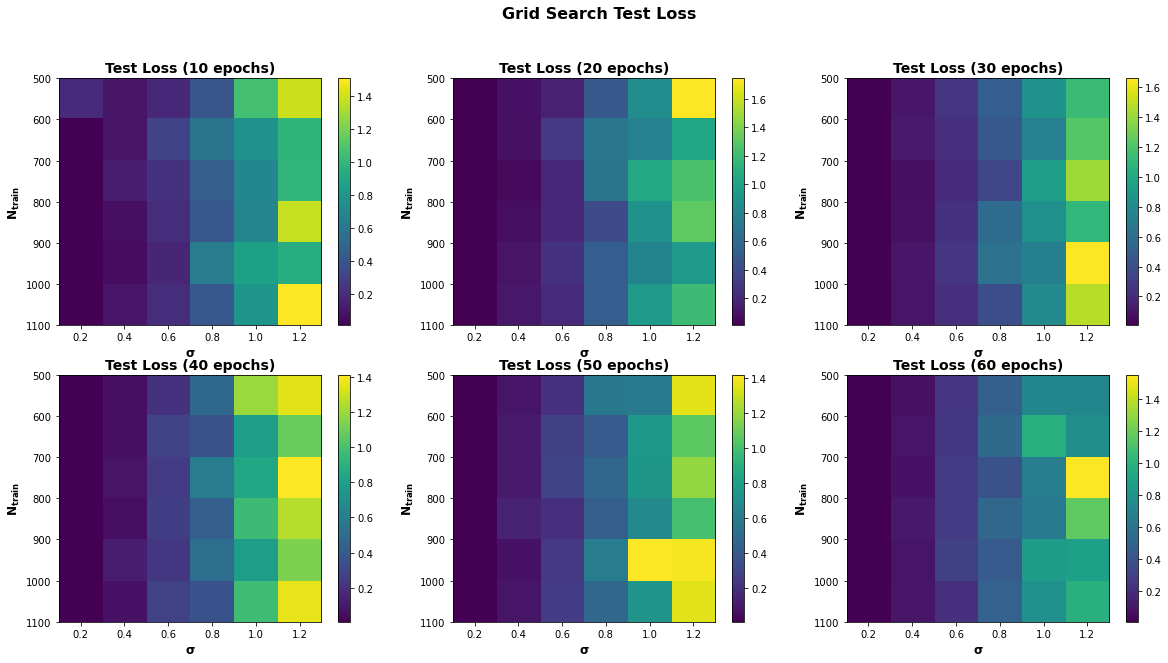

10 epochs:

Indexes of minimum test loss  (array([3]), array([0]))
N_train of minimum test loss 800.0
sigma of minimum test loss 0.1
Minimum Test Loss =  0.007924294099211693

Minimum Test Loss per sigma:
sigma =  0.1, N_train =  800.0:    0.007924294099211693
sigma =  0.3, N_train =  900.0:    0.06013498455286026
sigma =  0.5, N_train =  900.0:    0.17158323526382446
sigma =  0.7, N_train =  500.0:    0.4086116850376129
sigma =  0.9, N_train =  800.0:    0.6876957416534424
sigma =  1.1, N_train =  900.0:    0.9424852132797241

20 epochs:

Indexes of minimum test loss  (array([2]), array([0]))
N_train of minimum test loss 700.0
sigma of minimum test loss 0.1
Minimum Test Loss =  0.007940101437270641

Minimum Test Loss per sigma:
sigma =  0.1, N_train =  700.0:    0.007940101437270641
sigma =  0.3, N_train =  700.0:    0.05484117567539215
sigma =  0.5, N_train =  500.0:    0.16879959404468536
sigma =  0.7, N_train =  800.0:    0.40462353825569153
sigma =  0.9, N_train =  600.0:    0.763

In [9]:
test_loss10 = [[score10[i][j][0] for j in range(6)] for i in range(6)]
test_loss20 = [[score20[i][j][0] for j in range(6)] for i in range(6)]
test_loss30 = [[score30[i][j][0] for j in range(6)] for i in range(6)]
test_loss40 = [[score40[i][j][0] for j in range(6)] for i in range(6)]
test_loss50 = [[score50[i][j][0] for j in range(6)] for i in range(6)]
test_loss60 = [[score60[i][j][0] for j in range(6)] for i in range(6)]

import matplotlib
import matplotlib.pyplot as plt
import cv2

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle("Grid Search Test Loss", fontsize=16, fontweight = 'bold')


#x = sigma, y = N_train
img10 = ax[0][0].imshow(test_loss10, extent = [0.1 , 1.3 , 1100 , 500], aspect = 'auto')
img20 = ax[0][1].imshow(test_loss20, extent = [0.1 , 1.3 , 1100 , 500], aspect = 'auto')
img30 = ax[0][2].imshow(test_loss30, extent = [0.1 , 1.3 , 1100 , 500], aspect = 'auto')
img40 = ax[1][0].imshow(test_loss40, extent = [0.1 , 1.3 , 1100 , 500], aspect = 'auto')
img50 = ax[1][1].imshow(test_loss50, extent = [0.1 , 1.3 , 1100 , 500], aspect = 'auto')
img60 = ax[1][2].imshow(test_loss60, extent = [0.1 , 1.3 , 1100 , 500], aspect = 'auto')

plt.colorbar(img10, ax=ax[0][0])
plt.colorbar(img20, ax=ax[0][1])
plt.colorbar(img30, ax=ax[0][2])
plt.colorbar(img40, ax=ax[1][0])
plt.colorbar(img50, ax=ax[1][1])
plt.colorbar(img60, ax=ax[1][2])

ax[0][0].set_xlabel('$\mathbf{\sigma}$', fontsize = 12, fontweight = 'bold')
ax[0][0].set_ylabel('$\mathbf{N_{train}}$', fontsize = 12, fontweight = 'bold')
ax[0][0].set_title('Test Loss (10 epochs)', fontsize = 14, fontweight = 'bold')

ax[0][1].set_xlabel('$\mathbf{\sigma}$', fontsize = 12, fontweight = 'bold')
ax[0][1].set_ylabel('$\mathbf{N_{train}}$', fontsize = 12, fontweight = 'bold')
ax[0][1].set_title('Test Loss (20 epochs)', fontsize = 14, fontweight = 'bold')

ax[0][2].set_xlabel('$\mathbf{\sigma}$', fontsize = 12, fontweight = 'bold')
ax[0][2].set_ylabel('$\mathbf{N_{train}}$', fontsize = 12, fontweight = 'bold')
ax[0][2].set_title('Test Loss (30 epochs)', fontsize = 14, fontweight = 'bold')

ax[1][0].set_xlabel('$\mathbf{\sigma}$', fontsize = 12, fontweight = 'bold')
ax[1][0].set_ylabel('$\mathbf{N_{train}}$', fontsize = 12, fontweight = 'bold')
ax[1][0].set_title('Test Loss (40 epochs)', fontsize = 14, fontweight = 'bold')

ax[1][1].set_xlabel('$\mathbf{\sigma}$', fontsize = 12, fontweight = 'bold')
ax[1][1].set_ylabel('$\mathbf{N_{train}}$', fontsize = 12, fontweight = 'bold')
ax[1][1].set_title('Test Loss (50 epochs)', fontsize = 14, fontweight = 'bold')

ax[1][2].set_xlabel('$\mathbf{\sigma}$', fontsize = 12, fontweight = 'bold')
ax[1][2].set_ylabel('$\mathbf{N_{train}}$', fontsize = 12, fontweight = 'bold')
ax[1][2].set_title('Test Loss (60 epochs)', fontsize = 14, fontweight = 'bold')


sigma[0] = '{:.1f}'.format(sigma[0])
sigma[1] = '{:.1f}'.format(sigma[1])
sigma[2] = '{:.1f}'.format(sigma[2])
sigma[3] = '{:.1f}'.format(sigma[3])
sigma[4] = '{:.1f}'.format(sigma[4])
sigma[5] = '{:.1f}'.format(sigma[5])


plt.show()

ij_min10 = np.where(test_loss10 == np.amin(test_loss10))
print("10 epochs:\n")
print("Indexes of minimum test loss ",ij_min10)
print("N_train of minimum test loss",N_train[ij_min10[0][0]])
print("sigma of minimum test loss",sigma[ij_min10[1][0]])
print("Minimum Test Loss = ",np.amin(test_loss10))
print("\nMinimum Test Loss per sigma:")
print("sigma = ",sigma[0], end = ", ")
print("N_train = ",N_train[np.where([test_loss10[i][0] for i in range(6)] == np.amin([test_loss10[i][0] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss10[i][0] for i in range(6)]))
print("sigma = ",sigma[1], end = ", ")
print("N_train = ",N_train[np.where([test_loss10[i][1] for i in range(6)] == np.amin([test_loss10[i][1] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss10[i][1] for i in range(6)]))
print("sigma = ",sigma[2], end = ", ")
print("N_train = ",N_train[np.where([test_loss10[i][2] for i in range(6)] == np.amin([test_loss10[i][2] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss10[i][2] for i in range(6)]))
print("sigma = ",sigma[3], end = ", ")
print("N_train = ",N_train[np.where([test_loss10[i][3] for i in range(6)] == np.amin([test_loss10[i][3] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss10[i][3] for i in range(6)]))
print("sigma = ",sigma[4], end = ", ")
print("N_train = ",N_train[np.where([test_loss10[i][4] for i in range(6)] == np.amin([test_loss10[i][4] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss10[i][4] for i in range(6)]))
print("sigma = ",sigma[5], end = ", ")
print("N_train = ",N_train[np.where([test_loss10[i][5] for i in range(6)] == np.amin([test_loss10[i][5] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss10[i][5] for i in range(6)]))



ij_min20 = np.where(test_loss20 == np.amin(test_loss20))
print("\n20 epochs:\n")
print("Indexes of minimum test loss ",ij_min20)
print("N_train of minimum test loss",N_train[ij_min20[0][0]])
print("sigma of minimum test loss",sigma[ij_min20[1][0]])
print("Minimum Test Loss = ",np.amin(test_loss20))
print("\nMinimum Test Loss per sigma:")
print("sigma = ",sigma[0], end = ", ")
print("N_train = ",N_train[np.where([test_loss20[i][0] for i in range(6)] == np.amin([test_loss20[i][0] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss20[i][0] for i in range(6)]))
print("sigma = ",sigma[1], end = ", ")
print("N_train = ",N_train[np.where([test_loss20[i][1] for i in range(6)] == np.amin([test_loss20[i][1] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss20[i][1] for i in range(6)]))
print("sigma = ",sigma[2], end = ", ")
print("N_train = ",N_train[np.where([test_loss20[i][2] for i in range(6)] == np.amin([test_loss20[i][2] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss20[i][2] for i in range(6)]))
print("sigma = ",sigma[3], end = ", ")
print("N_train = ",N_train[np.where([test_loss20[i][3] for i in range(6)] == np.amin([test_loss20[i][3] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss20[i][3] for i in range(6)]))
print("sigma = ",sigma[4], end = ", ")
print("N_train = ",N_train[np.where([test_loss20[i][4] for i in range(6)] == np.amin([test_loss20[i][4] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss20[i][4] for i in range(6)]))
print("sigma = ",sigma[5], end = ", ")
print("N_train = ",N_train[np.where([test_loss20[i][5] for i in range(6)] == np.amin([test_loss20[i][5] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss20[i][5] for i in range(6)]))



ij_min30 = np.where(test_loss30 == np.amin(test_loss30))
print("\n30 epochs:\n")
print("Indexes of minimum test loss ",ij_min30)
print("N_train of minimum test loss",N_train[ij_min30[0][0]])
print("sigma of minimum test loss",sigma[ij_min30[1][0]])
print("Minimum Test Loss = ",np.amin(test_loss30))
print("\nMinimum Test Loss per sigma:")
print("sigma = ",sigma[0], end = ", ")
print("N_train = ",N_train[np.where([test_loss30[i][0] for i in range(6)] == np.amin([test_loss30[i][0] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss30[i][0] for i in range(6)]))
print("sigma = ",sigma[1], end = ", ")
print("N_train = ",N_train[np.where([test_loss30[i][1] for i in range(6)] == np.amin([test_loss30[i][1] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss30[i][1] for i in range(6)]))
print("sigma = ",sigma[2], end = ", ")
print("N_train = ",N_train[np.where([test_loss30[i][2] for i in range(6)] == np.amin([test_loss30[i][2] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss30[i][2] for i in range(6)]))
print("sigma = ",sigma[3], end = ", ")
print("N_train = ",N_train[np.where([test_loss30[i][3] for i in range(6)] == np.amin([test_loss30[i][3] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss30[i][3] for i in range(6)]))
print("sigma = ",sigma[4], end = ", ")
print("N_train = ",N_train[np.where([test_loss30[i][4] for i in range(6)] == np.amin([test_loss30[i][4] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss30[i][4] for i in range(6)]))
print("sigma = ",sigma[5], end = ", ")
print("N_train = ",N_train[np.where([test_loss30[i][5] for i in range(6)] == np.amin([test_loss30[i][5] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss30[i][5] for i in range(6)]))


ij_min40 = np.where(test_loss40 == np.amin(test_loss40))
print("40 epochs:\n")
print("Indexes of minimum test loss ",ij_min40)
print("N_train of minimum test loss",N_train[ij_min40[0][0]])
print("sigma of minimum test loss",sigma[ij_min40[1][0]])
print("Minimum Test Loss = ",np.amin(test_loss40))
print("\nMinimum Test Loss per sigma:")
print("sigma = ",sigma[0], end = ", ")
print("N_train = ",N_train[np.where([test_loss40[i][0] for i in range(6)] == np.amin([test_loss40[i][0] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss40[i][0] for i in range(6)]))
print("sigma = ",sigma[1], end = ", ")
print("N_train = ",N_train[np.where([test_loss40[i][1] for i in range(6)] == np.amin([test_loss40[i][1] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss40[i][1] for i in range(6)]))
print("sigma = ",sigma[2], end = ", ")
print("N_train = ",N_train[np.where([test_loss40[i][2] for i in range(6)] == np.amin([test_loss40[i][2] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss40[i][2] for i in range(6)]))
print("sigma = ",sigma[3], end = ", ")
print("N_train = ",N_train[np.where([test_loss40[i][3] for i in range(6)] == np.amin([test_loss40[i][3] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss40[i][3] for i in range(6)]))
print("sigma = ",sigma[4], end = ", ")
print("N_train = ",N_train[np.where([test_loss40[i][4] for i in range(6)] == np.amin([test_loss40[i][4] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss40[i][4] for i in range(6)]))
print("sigma = ",sigma[5], end = ", ")
print("N_train = ",N_train[np.where([test_loss40[i][5] for i in range(6)] == np.amin([test_loss40[i][5] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss40[i][5] for i in range(6)]))



ij_min50 = np.where(test_loss50 == np.amin(test_loss50))
print("\n50 epochs:\n")
print("Indexes of minimum test loss ",ij_min50)
print("N_train of minimum test loss",N_train[ij_min50[0][0]])
print("sigma of minimum test loss",sigma[ij_min50[1][0]])
print("Minimum Test Loss = ",np.amin(test_loss50))
print("\nMinimum Test Loss per sigma:")
print("sigma = ",sigma[0], end = ", ")
print("N_train = ",N_train[np.where([test_loss50[i][0] for i in range(6)] == np.amin([test_loss50[i][0] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss50[i][0] for i in range(6)]))
print("sigma = ",sigma[1], end = ", ")
print("N_train = ",N_train[np.where([test_loss50[i][1] for i in range(6)] == np.amin([test_loss50[i][1] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss50[i][1] for i in range(6)]))
print("sigma = ",sigma[2], end = ", ")
print("N_train = ",N_train[np.where([test_loss50[i][2] for i in range(6)] == np.amin([test_loss50[i][2] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss50[i][2] for i in range(6)]))
print("sigma = ",sigma[3], end = ", ")
print("N_train = ",N_train[np.where([test_loss50[i][3] for i in range(6)] == np.amin([test_loss50[i][3] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss50[i][3] for i in range(6)]))
print("sigma = ",sigma[4], end = ", ")
print("N_train = ",N_train[np.where([test_loss50[i][4] for i in range(6)] == np.amin([test_loss50[i][4] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss50[i][4] for i in range(6)]))
print("sigma = ",sigma[5], end = ", ")
print("N_train = ",N_train[np.where([test_loss50[i][5] for i in range(6)] == np.amin([test_loss50[i][5] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss50[i][5] for i in range(6)]))



ij_min60 = np.where(test_loss60 == np.amin(test_loss60))
print("\n60 epochs:\n")
print("Indexes of minimum test loss ",ij_min60)
print("N_train of minimum test loss",N_train[ij_min60[0][0]])
print("sigma of minimum test loss",sigma[ij_min60[1][0]])
print("Minimum Test Loss = ",np.amin(test_loss60))
print("\nMinimum Test Loss per sigma:")
print("sigma = ",sigma[0], end = ", ")
print("N_train = ",N_train[np.where([test_loss60[i][0] for i in range(6)] == np.amin([test_loss60[i][0] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss60[i][0] for i in range(6)]))
print("sigma = ",sigma[1], end = ", ")
print("N_train = ",N_train[np.where([test_loss60[i][1] for i in range(6)] == np.amin([test_loss60[i][1] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss60[i][1] for i in range(6)]))
print("sigma = ",sigma[2], end = ", ")
print("N_train = ",N_train[np.where([test_loss60[i][2] for i in range(6)] == np.amin([test_loss60[i][2] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss60[i][2] for i in range(6)]))
print("sigma = ",sigma[3], end = ", ")
print("N_train = ",N_train[np.where([test_loss60[i][3] for i in range(6)] == np.amin([test_loss60[i][3] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss60[i][3] for i in range(6)]))
print("sigma = ",sigma[4], end = ", ")
print("N_train = ",N_train[np.where([test_loss60[i][4] for i in range(6)] == np.amin([test_loss60[i][4] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss60[i][4] for i in range(6)]))
print("sigma = ",sigma[5], end = ", ")
print("N_train = ",N_train[np.where([test_loss60[i][5] for i in range(6)] == np.amin([test_loss60[i][5] for i in range(6)]))][0], end = ":    ")
print(np.amin([test_loss60[i][5] for i in range(6)]))

Chiaramente i risultati migliori sono ottenuti quando l'errore $\sigma$ è minimo ($\sigma=0.1$).

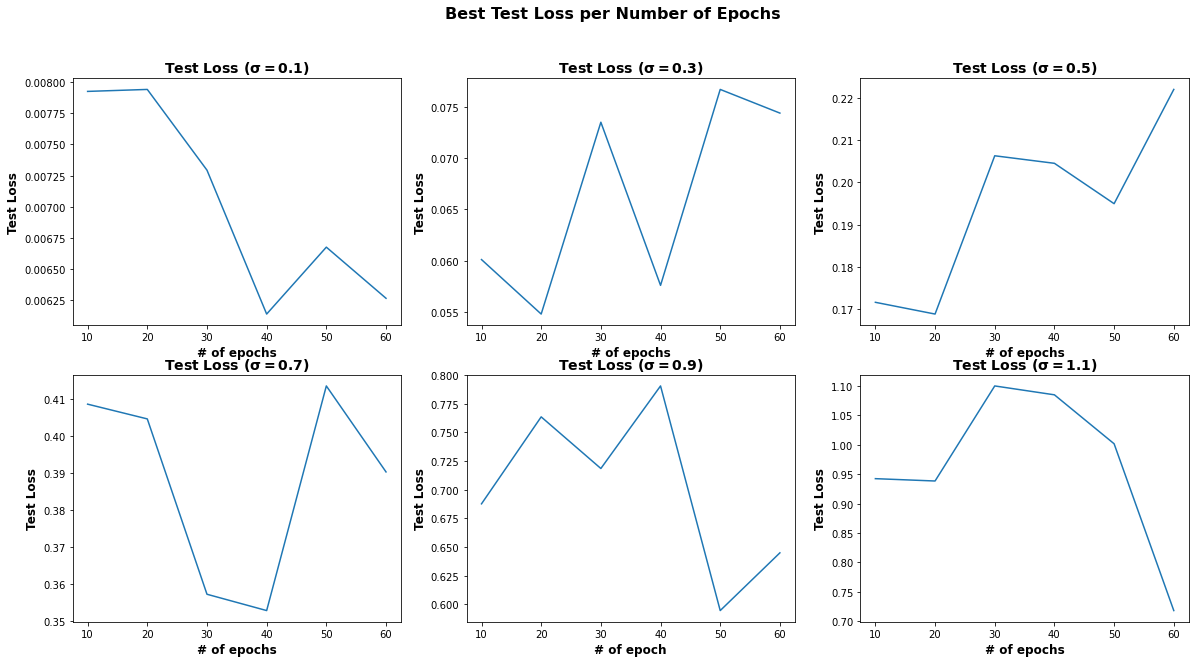

In [11]:
best01 = []
best03 = []
best05 = []
best07 = []
best09 = []
best11 = []

best01.append(np.amin([test_loss10[i][0] for i in range(6)])),best01.append(np.amin([test_loss20[i][0] for i in range(6)])),best01.append(np.amin([test_loss30[i][0] for i in range(6)])),best01.append(np.amin([test_loss40[i][0] for i in range(6)])),best01.append(np.amin([test_loss50[i][0] for i in range(6)])),best01.append(np.amin([test_loss60[i][0] for i in range(6)]))
best03.append(np.amin([test_loss10[i][1] for i in range(6)])),best03.append(np.amin([test_loss20[i][1] for i in range(6)])),best03.append(np.amin([test_loss30[i][1] for i in range(6)])),best03.append(np.amin([test_loss40[i][1] for i in range(6)])),best03.append(np.amin([test_loss50[i][1] for i in range(6)])),best03.append(np.amin([test_loss60[i][1] for i in range(6)]))
best05.append(np.amin([test_loss10[i][2] for i in range(6)])),best05.append(np.amin([test_loss20[i][2] for i in range(6)])),best05.append(np.amin([test_loss30[i][2] for i in range(6)])),best05.append(np.amin([test_loss40[i][2] for i in range(6)])),best05.append(np.amin([test_loss50[i][2] for i in range(6)])),best05.append(np.amin([test_loss60[i][2] for i in range(6)]))
best07.append(np.amin([test_loss10[i][3] for i in range(6)])),best07.append(np.amin([test_loss20[i][3] for i in range(6)])),best07.append(np.amin([test_loss30[i][3] for i in range(6)])),best07.append(np.amin([test_loss40[i][3] for i in range(6)])),best07.append(np.amin([test_loss50[i][3] for i in range(6)])),best07.append(np.amin([test_loss60[i][3] for i in range(6)]))
best09.append(np.amin([test_loss10[i][4] for i in range(6)])),best09.append(np.amin([test_loss20[i][4] for i in range(6)])),best09.append(np.amin([test_loss30[i][4] for i in range(6)])),best09.append(np.amin([test_loss40[i][4] for i in range(6)])),best09.append(np.amin([test_loss50[i][4] for i in range(6)])),best09.append(np.amin([test_loss60[i][4] for i in range(6)]))
best11.append(np.amin([test_loss10[i][5] for i in range(6)])),best11.append(np.amin([test_loss20[i][5] for i in range(6)])),best11.append(np.amin([test_loss30[i][5] for i in range(6)])),best11.append(np.amin([test_loss40[i][5] for i in range(6)])),best11.append(np.amin([test_loss50[i][5] for i in range(6)])),best11.append(np.amin([test_loss60[i][5] for i in range(6)]))

fig, ax = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle("Best Test Loss per Number of Epochs", fontsize=16, fontweight = 'bold')
n_epochs = [10,20,30,40,50,60]

ax[0][0].plot(n_epochs,best01)
ax[0][0].set_ylabel('Test Loss', fontsize = 12, fontweight = 'bold')
ax[0][0].set_xlabel('# of epochs', fontsize = 12, fontweight = 'bold')
ax[0][0].set_title('Test Loss ($\mathbf{\sigma = 0.1}$)', fontsize = 14, fontweight = 'bold')

ax[0][1].plot(n_epochs,best03)
ax[0][1].set_ylabel('Test Loss', fontsize = 12, fontweight = 'bold')
ax[0][1].set_xlabel('# of epochs', fontsize = 12, fontweight = 'bold')
ax[0][1].set_title('Test Loss ($\mathbf{\sigma = 0.3}$)', fontsize = 14, fontweight = 'bold')

ax[0][2].plot(n_epochs,best05)
ax[0][2].set_ylabel('Test Loss', fontsize = 12, fontweight = 'bold')
ax[0][2].set_xlabel('# of epochs', fontsize = 12, fontweight = 'bold')
ax[0][2].set_title('Test Loss ($\mathbf{\sigma = 0.5}$)', fontsize = 14, fontweight = 'bold')

ax[1][0].plot(n_epochs,best07)
ax[1][0].set_ylabel('Test Loss', fontsize = 12, fontweight = 'bold')
ax[1][0].set_xlabel('# of epochs', fontsize = 12, fontweight = 'bold')
ax[1][0].set_title('Test Loss ($\mathbf{\sigma = 0.7}$)', fontsize = 14, fontweight = 'bold')

ax[1][1].plot(n_epochs,best09)
ax[1][1].set_ylabel('Test Loss', fontsize = 12, fontweight = 'bold')
ax[1][1].set_xlabel('# of epoch', fontsize = 12, fontweight = 'bold')
ax[1][1].set_title('Test Loss ($\mathbf{\sigma = 0.9}$)', fontsize = 14, fontweight = 'bold')

ax[1][2].plot(n_epochs,best11)
ax[1][2].set_ylabel('Test Loss', fontsize = 12, fontweight = 'bold')
ax[1][2].set_xlabel('# of epochs', fontsize = 12, fontweight = 'bold')
ax[1][2].set_title('Test Loss ($\mathbf{\sigma = 1.1}$)', fontsize = 14, fontweight = 'bold')


plt.show()


Si vede come all'aumento del numero di epoche (prendendo la coppia $(N_{train},n_{epochs})$ con i risultati migliori) non corrisponde necessariamente una diminuzione della funzione di costo.

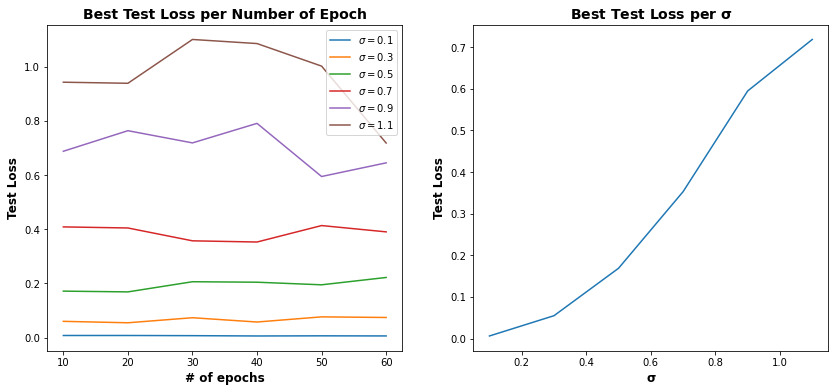

In [12]:
best_sigma = []
best_sigma.append(np.amin(best01)),best_sigma.append(np.amin(best03)),best_sigma.append(np.amin(best05)),best_sigma.append(np.amin(best07)),best_sigma.append(np.amin(best09)),best_sigma.append(np.amin(best11))

fig = plt.figure(figsize = (14,6))
#fig.suptitle("Thermodynamic Quantities, Ising 1D", fontsize = 16, fontweight = "bold")
ax = fig.add_subplot(121)

plt.plot(n_epochs,best01)
plt.plot(n_epochs,best03)
plt.plot(n_epochs,best05)
plt.plot(n_epochs,best07)
plt.plot(n_epochs,best09)
plt.plot(n_epochs,best11)

ax.set_title('Best Test Loss per Number of Epoch', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Test Loss', fontsize = 12, fontweight = 'bold')
ax.set_xlabel('# of epochs', fontsize = 12, fontweight = 'bold')
ax.legend(['$\sigma = 0.1$', '$\sigma = 0.3$', '$\sigma = 0.5$', '$\sigma = 0.7$', '$\sigma = 0.9$', '$\sigma = 1.1$'], loc='best')

ax = fig.add_subplot(122)

plt.plot(sigma,best_sigma)

ax.set_title('Best Test Loss per $\mathbf{\sigma}$', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Test Loss', fontsize = 12, fontweight = 'bold')
ax.set_xlabel('$\mathbf{\sigma}$', fontsize = 12, fontweight = 'bold')

plt.show()

Ora considero per ogni $\sigma$ la coppia $(N_{train},n_{epochs})$ che ha dato il miglior risultato:


Minimum Test Loss per sigma:
sigma = 0.1
N_train = 600, n_epochs = 40
Test Loss =  0.006139276083558798
m =  2.0094635486602783, b =  0.9969154000282288

sigma = 0.3
N_train = 700, n_epochs = 20
Test Loss =  0.05484117567539215
m =  2.00840163230896, b =  1.0069239139556885

sigma = 0.5
N_train = 500, n_epochs = 20
Test Loss =  0.16879959404468536
m =  2.035062313079834, b =  0.9986358880996704

sigma = 0.7
N_train = 600, n_epochs = 40
Test Loss =  0.3528153896331787
m =  2.0361452102661133, b =  0.9965873956680298

sigma = 0.9
N_train = 500, n_epochs = 50
Test Loss =  0.5945382714271545
m =  1.983452320098877, b =  0.9565958976745605

sigma = 1.1
N_train = 500, n_epochs = 60
Test Loss =  0.7181247472763062
m =  2.050143241882324, b =  1.0496081113815308



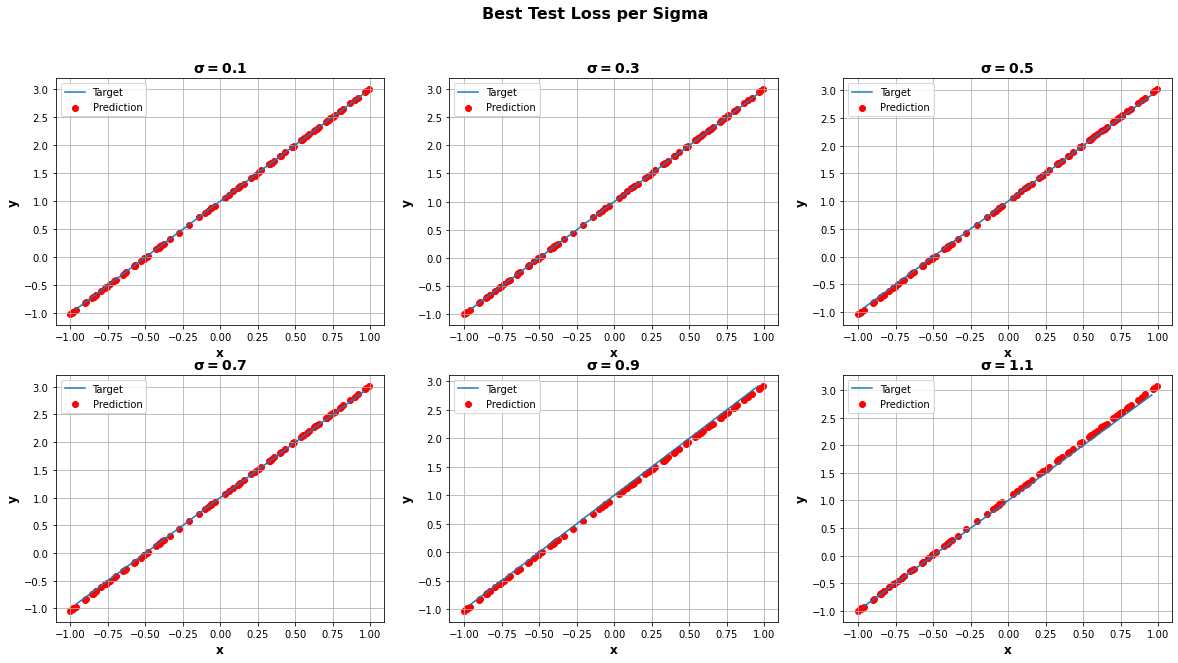

In [15]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
fig.suptitle("Best Test Loss per Sigma", fontsize=16, fontweight = 'bold')
x_predicted = np.random.uniform(-1, 1, 100)

print("\nMinimum Test Loss per sigma:")
print("sigma = 0.1")
print("N_train = 600, n_epochs = 40")
print("Test Loss = ",test_loss40[1][0])
print("m = ",weight40[1][0][0], end = ", ")
print("b = ",weight40[1][0][1], end = "\n\n")
y_predicted = x_predicted*weight40[1][0][0] + weight40[1][0][1]
ax[0][0].scatter(x_predicted, y_predicted,color='r', label = 'Prediction')
ax[0][0].plot(x_valid, y_target, label = 'Target')
ax[0][0].set_ylabel('y', fontsize = 12, fontweight = 'bold')
ax[0][0].set_xlabel('x', fontsize = 12, fontweight = 'bold')
ax[0][0].grid()
ax[0][0].set_title('$\mathbf{\sigma = 0.1}$', fontsize = 14, fontweight = 'bold')
ax[0][0].legend()

print("sigma = 0.3")
print("N_train = 700, n_epochs = 20")
print("Test Loss = ",test_loss20[2][1])
print("m = ",weight20[2][1][0], end = ", ")
print("b = ",weight20[2][1][1], end = "\n\n")
y_predicted = x_predicted*weight20[2][1][0] + weight20[2][1][1]
ax[0][1].scatter(x_predicted, y_predicted,color='r', label = 'Prediction')
ax[0][1].plot(x_valid, y_target, label = 'Target')
ax[0][1].set_ylabel('y', fontsize = 12, fontweight = 'bold')
ax[0][1].set_xlabel('x', fontsize = 12, fontweight = 'bold')
ax[0][1].grid()
ax[0][1].set_title('$\mathbf{\sigma = 0.3}$', fontsize = 14, fontweight = 'bold')
ax[0][1].legend()

print("sigma = 0.5")
print("N_train = 500, n_epochs = 20")
print("Test Loss = ",test_loss20[0][2])
print("m = ",weight20[0][2][0], end = ", ")
print("b = ",weight20[0][2][1], end = "\n\n")
y_predicted = x_predicted*weight20[0][2][0] + weight20[0][2][1]
ax[0][2].scatter(x_predicted, y_predicted,color='r', label = 'Prediction')
ax[0][2].plot(x_valid, y_target, label = 'Target')
ax[0][2].set_ylabel('y', fontsize = 12, fontweight = 'bold')
ax[0][2].set_xlabel('x', fontsize = 12, fontweight = 'bold')
ax[0][2].grid()
ax[0][2].set_title('$\mathbf{\sigma = 0.5}$', fontsize = 14, fontweight = 'bold')
ax[0][2].legend()

print("sigma = 0.7")
print("N_train = 600, n_epochs = 40")
print("Test Loss = ",test_loss40[1][3])
print("m = ",weight40[1][3][0], end = ", ")
print("b = ",weight40[1][3][1], end = "\n\n")
y_predicted = x_predicted*weight40[1][3][0] + weight40[1][3][1]
ax[1][0].scatter(x_predicted, y_predicted,color='r', label = 'Prediction')
ax[1][0].plot(x_valid, y_target, label = 'Target')
ax[1][0].set_ylabel('y', fontsize = 12, fontweight = 'bold')
ax[1][0].set_xlabel('x', fontsize = 12, fontweight = 'bold')
ax[1][0].grid()
ax[1][0].set_title('$\mathbf{\sigma = 0.7}$', fontsize = 14, fontweight = 'bold')
ax[1][0].legend()

print("sigma = 0.9")
print("N_train = 500, n_epochs = 50")
print("Test Loss = ",test_loss50[0][4])
print("m = ",weight50[0][4][0], end = ", ")
print("b = ",weight50[0][4][1], end = "\n\n")
y_predicted = x_predicted*weight50[0][4][0] + weight50[0][4][1]
ax[1][1].scatter(x_predicted, y_predicted,color='r', label = 'Prediction')
ax[1][1].plot(x_valid, y_target, label = 'Target')
ax[1][1].set_ylabel('y', fontsize = 12, fontweight = 'bold')
ax[1][1].set_xlabel('x', fontsize = 12, fontweight = 'bold')
ax[1][1].grid()
ax[1][1].set_title('$\mathbf{\sigma = 0.9}$', fontsize = 14, fontweight = 'bold')
ax[1][1].legend()

print("sigma = 1.1")
print("N_train = 500, n_epochs = 60")
print("Test Loss = ",test_loss60[0][5])
print("m = ",weight60[0][5][0], end = ", ")
print("b = ",weight60[0][5][1], end = "\n\n")
y_predicted = x_predicted*weight60[0][5][0] + weight60[0][5][1]
ax[1][2].scatter(x_predicted, y_predicted,color='r', label = 'Prediction')
ax[1][2].plot(x_valid, y_target, label = 'Target')
ax[1][2].set_ylabel('y', fontsize = 12, fontweight = 'bold')
ax[1][2].set_xlabel('x', fontsize = 12, fontweight = 'bold')
ax[1][2].grid()
ax[1][2].set_title('$\mathbf{\sigma = 1.1}$', fontsize = 14, fontweight = 'bold')
ax[1][2].legend()

plt.show()

Le reti neurali riescono, per ogni $\sigma$ considerato, a fare previsioni corrette. Vista la semplicità del problema, non mi aspettavo un risultato molto diverso.